<a href="https://colab.research.google.com/github/Rohanrathod7/my-ml-labs/blob/main/18_Natural_Language_Processing_with_spaCy/02_spaCy_Linguistic_Annotations_and_Word_Vectors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 2. spaCy Linguistic Annotations and Word Vectors



Learn about linguistic features, word vectors, semantic similarity, analogies, and word vector operations. In this chapter you’ll discover how to use spaCy to extract word vectors, categorize texts that are relevant to a given topic and find semantically similar terms to given words from a corpus or from a spaCy model vocabulary.

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import datetime as dt
# Import confusion matrix and train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import Ridge, Lasso, LogisticRegression, LinearRegression
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier

url = "https://raw.githubusercontent.com/Rohanrathod7/my-ml-labs/main/15_Hyperparameter_Tuning_in_Python/Dataset/results_df.csv"
# Read the CSV file
# Apply pd.to_numeric only to relevant columns, excluding 'text'
results_df = pd.read_csv(url)


display(results_df.head())

,max_depth,min_samples_leaf,learn_rate,accuracy
0,4,16,0.624362,95
1,10,14,0.477450,97
2,7,14,0.050067,96
3,5,12,0.023356,96
4,6,12,0.771275,97


In [13]:
!python3 pip install spacy
!python3 -m spacy download en_core_web_sm

python3: can't open file '/content/pip': [Errno 2] No such file or directory
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 104.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [14]:
# Load en_core_web_sm and create an nlp object
import spacy
nlp = spacy.load("en_core_web_sm")

### Linguistic features

**Linguistic annotations in spaCy**  
Linguistic annotations that are available in spaCy, such as POS tagging, named-entity recognition, and dependency parsing, can be used to better understand writing quality and learn about many aspects of human language, including words, sentences, and meaning. In this exercise, you'll practice your learnings on different linguistic features.

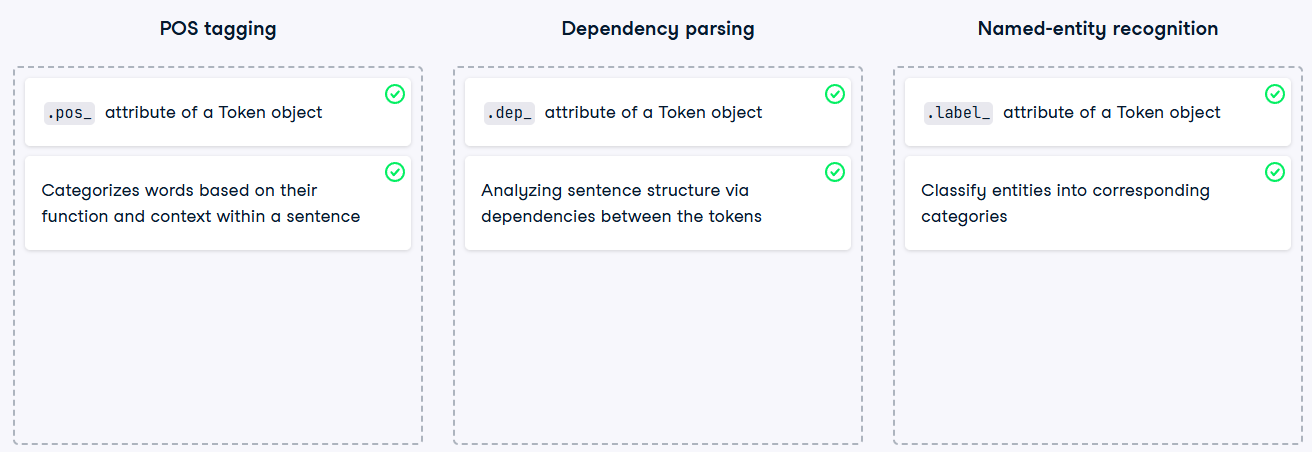

**Word-sense disambiguation with spaCy**   
WSD is a classical problem of deciding in which sense a word is used in a sentence. Determining the sense of the word can be crucial in search engines, machine translation, and question-answering systems. In this exercise, you will practice using POS tagging for word-sense disambiguation.

There are two sentences containing the word jam, with two different senses and you are tasked to identify the POS tags to help you determine the corresponding sense of the word in a given sentence.

The two sentences are available in the texts list. The en_core_web_sm model is already loaded and available for your use as nlp.

In [15]:
texts = ["This device is used to jam the signal.",
         "I am stuck in a traffic jam"]

# Create a list of Doc containers in the texts list
documents = [nlp(t) for t in texts]

# Print a token's text and POS tag if the word jam is in the token's text
for i, doc in enumerate(documents):
    print(f"Sentence {i+1}: ", [(token.text, token.pos_) for token in doc if "jam" in token.text], "\n")

Sentence 1:  [('jam', 'VERB')] 

Sentence 2:  [('jam', 'NOUN')] 



**Question**  
The word jam has multiple senses. In the sentence "This device is used to jam the signal.", what is the sense of the word jam?


    -> VERB: become or make unable to move or work due to a part seizing or becoming stuck.
    
    A word can have many senses, predicted POS tag can help with word sense disambiguation. In this case, jam is a VERB and its meaning to becoming stuck.

In [16]:
# Create a list of Doc containts of texts list
documents = [nlp(t) for t in texts]

# Print each token's text, dependency label and its explanation
for doc in documents:
    print([(token.text, token.dep_, spacy.explain(token.dep_)) for token in doc], "\n")


# You are now able to extract dependency relationships between words of a given text.
# Don't worry if you are not familiar with all the extracted dependency labels for the given texts;
# spacy.explain() can always help you learn more about a token's tag.

[('This', 'det', 'determiner'), ('device', 'nsubjpass', 'nominal subject (passive)'), ('is', 'auxpass', 'auxiliary (passive)'), ('used', 'ROOT', 'root'), ('to', 'aux', 'auxiliary'), ('jam', 'xcomp', 'open clausal complement'), ('the', 'det', 'determiner'), ('signal', 'dobj', 'direct object'), ('.', 'punct', 'punctuation')] 

[('I', 'nsubjpass', 'nominal subject (passive)'), ('am', 'auxpass', 'auxiliary (passive)'), ('stuck', 'ROOT', 'root'), ('in', 'prep', 'prepositional modifier'), ('a', 'det', 'determiner'), ('traffic', 'compound', 'compound'), ('jam', 'pobj', 'object of preposition')] 



### Introduction to word vectors

**spaCy vocabulary**  
Word vectors, or word embeddings, are numerical representations of words that allow computers to perform complex tasks using text data. Word vectors are a part of many spaCy models, however, a few of the models do not have word vectors.

In this exercise, you will practice accessing spaCy vocabulary information. Some meta information about word vectors are stored in each spaCy model. You can access this information to learn more about the vocabulary size, word vectors dimensions, etc.

The spaCy package is already imported for your use. In a spaCy model's metadata, the number of words is stored as an element with the "vectors" key and the dimension of word vectors is stored as an element with the "width" key.

In [17]:
!python3 -m spacy download en_core_web_md

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.5/33.5 MB 37.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [18]:
# Load the en_core_web_md model
md_nlp = spacy.load('en_core_web_md')

# Print the number of words in the model's vocabulary
print("Number of words: ", md_nlp.meta["vectors"]["vectors"], "\n")

# Print the dimensions of word vectors in en_core_web_md model
print("Dimension of word vectors: ", md_nlp.meta["vectors"]["width"])

# You successfully accessed a model's metadata to extract word vector informamtion and
# you know that the en_core_web_md model has 20,000 word vectors of 300 dimensions.

Number of words:  20000 

Dimension of word vectors:  300


**Word vectors in spaCy vocabulary**  
The purpose of word vectors is to allow a computer to understand words. In this exercise, you will practice extracting word vectors for a given list of words.

A list of words is compiled as words. The en_core_web_md model is already imported and available as nlp.

The vocabulary of en_core_web_md model contains 20,000 words. If a word does not exist in the vocabulary, you will not be able to extract its corresponding word vector. In this exercise, for simplicity, it is ensured that all the given words exist in this model's vocabulary.

In [19]:
words = ["like", "love"]

# IDs of all the given words
ids = [md_nlp.vocab.strings[w] for w in words]

# Store the first ten elements of the word vectors for each word
word_vectors = [md_nlp.vocab.vectors[i][:10] for i in ids]

# Print the first ten elements of the first word vector
print(word_vectors[0])

# ou successfully extracted word vectors from a given list of words using a spaCy model.
# If a word does not exist in the vocabulary of a spaCy model, you will observe an error and
# will not be able to extract its corresponding word vector

[-0.61052   0.11656  -0.50648  -0.32216  -0.099742  0.10182   0.31042
 -0.18155   0.31774   2.1537  ]


### Word vectors and spaCy

**Analogies and vector operations**   
Word vectors can capture semantics and can also support vector operations and word analogies. A word analogy is a semantic relationship between a pair of words. In this exercise, you will practice your understanding of analogies and vector operations.

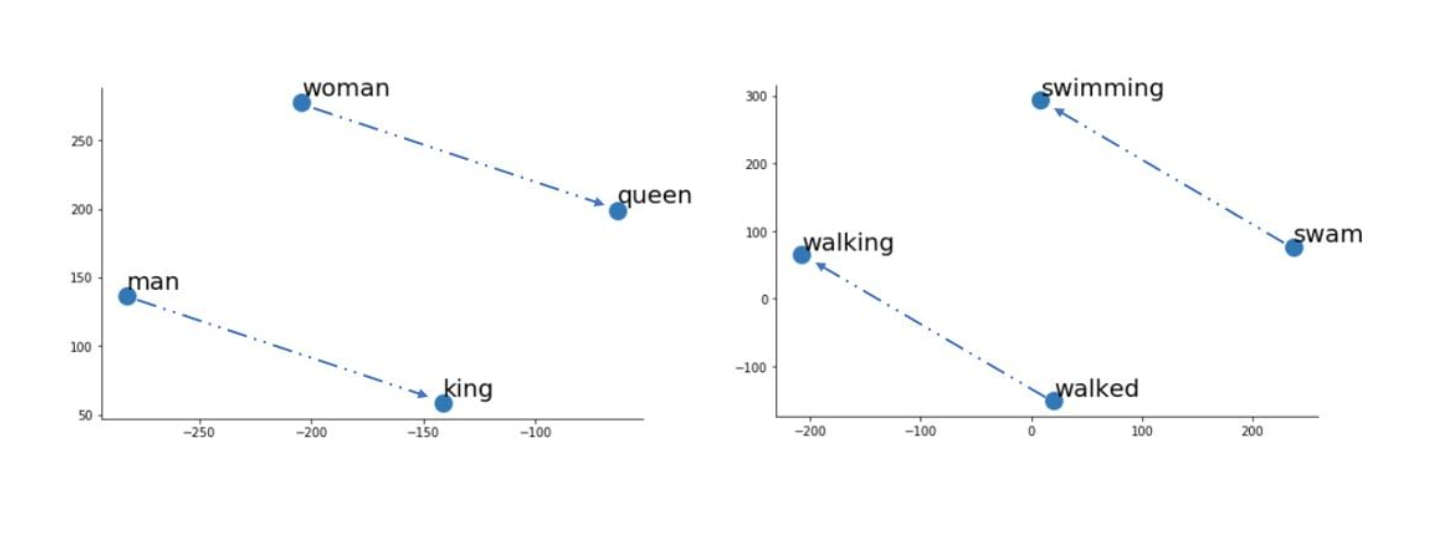


->
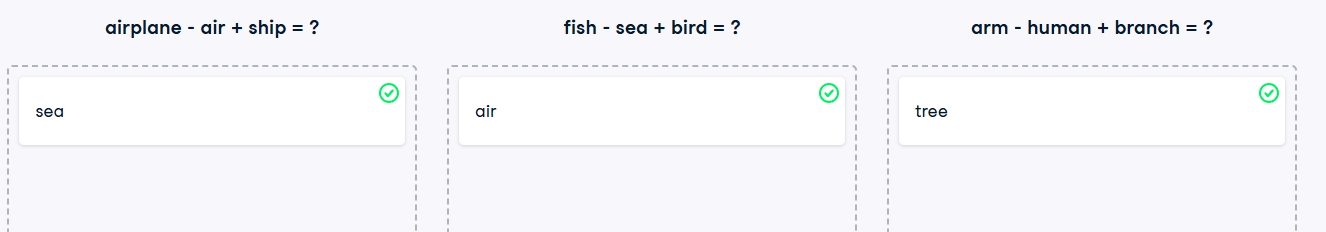



**Word vectors projection**   
You can visualize word vectors in a scatter plot to help you understand how the vocabulary words are grouped. In order to visualize word vectors, you need to project them into a two-dimensional space. You can project vectors by extracting the two principal components via Principal Component Analysis (PCA).

In this exercise, you will practice how to extract word vectors and project them into two-dimensional space using the PCA library from sklearn.

A short list of words that are stored in the words list and the en_core_web_md model are available for use. The model is loaded as nlp. All necessary libraries and packages are already imported for your use (PCA, numpy as np).

In [21]:
from sklearn.decomposition import PCA
import numpy as np
import spacy

words = ["tiger", "bird"]

# Extract word IDs of given words
word_ids = [md_nlp.vocab.strings[w] for w in words]

# Extract word vectors and stack the first five elements vertically
word_vectors = np.vstack([md_nlp.vocab.vectors[i][:5] for i in word_ids])

# Calculate the transformed word vectors using the pca object
pca = PCA(n_components=2)
word_vectors_transformed = pca.fit_transform(word_vectors)

# Print the first component of the transformed word vectors
print(word_vectors_transformed[:, 0])

[-0.47121444  0.47121444]


**Similar words in a vocabulary**  
Finding semantically similar terms has various applications in information retrieval. In this exercise, you will practice finding the most semantically similar term to the word computer from the en_core_web_md model's vocabulary.

The computer word vector is already extracted and stored as word_vector. The en_core_web_md model is already loaded as nlp, and NumPy package is loaded as np.

You can use the .most_similar() function of the nlp.vocab.vectors object to find the most semantically similar terms. Using [0][0] to index the output of this function will return the word IDs of the semantically similar terms. nlp.vocab.strings[<a given word>] can be used to find the word ID of a given word and it can similarly return the word associated with a given word ID.

In [24]:
import numpy as np
word_vector = np.array([-0.26657  , -0.13717  ,  0.23549  , -0.26712  ,  0.093324 ,
        0.17563  , -0.33309  , -0.81744  ,  0.52655  ,  1.588    ,
        0.078138 , -0.093094 , -0.27167  , -0.31207  , -0.35018  ,
        0.072898 ,  0.032007 ,  2.5085   , -0.35727  , -0.018104 ,
        0.26102  , -0.3157   , -0.46466  ,  0.029905 ,  0.576    ,
       -0.34603  , -0.1502   , -0.23481  ,  0.20626  ,  0.28202  ,
       -0.6897   , -0.17632  ,  0.40369  ,  0.40672  ,  0.13068  ,
       -0.059988 , -0.3405   ,  0.46314  , -0.21149  ,  0.033152 ,
        0.36526  ,  0.049521 , -0.096128 , -0.087093 , -0.12957  ,
        0.22673  , -0.50435  , -0.50732  ,  0.27695  ,  0.14523  ,
       -0.11455  , -0.13968  ,  0.38549  ,  0.26088  , -0.43217  ,
       -0.45305  ,  0.072362 , -0.53383  ,  0.23317  ,  0.10471  ,
        0.51278  , -0.05899  ,  0.06051  ,  0.22083  ,  0.63098  ,
       -0.03232  , -0.36192  ,  0.45576  ,  0.037796 ,  0.21651  ,
        0.44988  , -0.33074  ,  0.32553  , -0.30153  , -0.20416  ,
       -0.14665  ,  0.16424  ,  0.13373  , -0.16779  ,  1.1746   ,
       -0.10912  , -0.20507  ,  0.38651  , -0.35737  , -0.026643 ,
        0.17325  , -0.2969   ,  0.67039  ,  0.75858  , -0.1168   ,
       -0.13134  ,  0.38176  , -0.4658   ,  0.025771 ,  0.0082968,
       -0.7205   ,  0.48854  ,  0.14139  , -0.2939   ,  0.24961  ,
       -0.35349  ,  0.018458 ,  0.54134  ,  0.10035  , -0.076024 ,
       -1.3677   ,  0.045979 ,  0.15556  ,  0.3356   ,  0.15967  ,
        0.27533  ,  0.36783  ,  0.16304  , -0.11103  , -0.40265  ,
       -0.058919 , -0.21596  ,  0.19496  ,  0.059413 ,  0.30387  ,
        0.27047  ,  0.017042 ,  0.39704  , -0.13852  ,  0.12767  ,
        0.41707  ,  0.24256  ,  0.91752  ,  0.45297  ,  0.56209  ,
        0.54665  ,  0.29862  , -0.17171  ,  0.2429   , -0.039825 ,
       -0.36826  , -0.173    ,  0.25535  , -0.072918 ,  0.077173 ,
       -1.0758   , -0.059065 ,  0.1631   , -0.16374  ,  0.083568 ,
        0.3455   , -0.072737 , -0.26645  , -0.3967   , -0.13455  ,
        0.26312  , -0.20706  ,  0.18288  ,  0.11587  , -0.11174  ,
        0.14654  ,  0.093874 ,  0.13199  ,  0.27867  , -0.6574   ,
        0.13134  , -0.10831  ,  0.49168  , -0.056289 , -0.33275  ,
       -0.15492  , -0.040728 ,  0.064694 , -0.032248 ,  0.61083  ,
       -0.56753  ,  0.15492  ,  0.2884   , -0.084649 ,  0.18294  ,
        0.17448  , -0.3491   , -0.10422  , -0.77571  ,  0.30476  ,
       -0.095897 , -0.33695  ,  0.161    , -0.15076  ,  0.14437  ,
        0.27484  ,  0.10077  ,  0.32409  ,  0.21695  , -0.53414  ,
       -0.22338  , -0.43562  , -0.32303  ,  0.58586  , -0.23184  ,
       -0.0181   ,  0.19989  , -0.35086  , -0.08002  ,  0.19299  ,
        0.095799 ,  0.27447  ,  0.43433  , -0.098884 ,  0.14404  ,
       -0.20874  ,  0.015602 ,  0.094597 ,  0.4834   ,  0.010013 ,
       -0.14255  , -0.58035  , -0.30333  ,  0.051996 , -0.15122  ,
       -0.37053  , -0.37321  , -0.034599 , -0.99269  , -0.15557  ,
        0.12362  , -0.18469  , -0.29648  ,  0.014692 , -0.065477 ,
       -0.13687  ,  0.39093  ,  0.56124  ,  0.42304  , -0.21074  ,
       -0.3262   , -0.071347 ,  0.27527  , -0.18207  , -0.43537  ,
        0.15757  ,  0.26226  , -0.37498  , -0.47008  ,  0.1778   ,
        0.6498   ,  0.14257  ,  0.14552  , -0.12116  , -0.12345  ,
       -0.65636  , -0.23754  ,  0.054897 , -0.34359  ,  0.26974  ,
        0.29918  , -0.28367  ,  0.17973  ,  0.45228  ,  0.46051  ,
       -0.51592  , -0.26155  ,  0.083629 , -0.066247 ,  0.13831  ,
        0.57407  ,  0.55507  ,  0.063494 , -0.37227  , -0.47057  ,
       -0.42985  , -0.64027  ,  0.071124 ,  0.86233  ,  0.05462  ,
       -0.5722   , -0.17404  , -0.022872 , -0.30434  , -0.18376  ,
        0.069443 , -0.25937  ,  0.22505  , -0.41308  , -0.90509  ,
        0.19915  , -0.4752   ,  0.19739  ,  0.27136  , -0.21026  ,
       -0.61475  , -0.092514 ,  0.048717 , -0.22783  , -0.60863  ,
       -0.78686  , -0.16716  ,  0.37552  ,  0.57434  ,  0.055414 ,
       -0.22545  ,  0.30528  ,  0.35608  , -0.46496  ,  0.13914  ],
      dtype=np.float32)

# Find the most similar word to the word computer
most_similar_words = md_nlp.vocab.vectors.most_similar(np.asarray([word_vector]), n = 1)

# Find the list of similar words given the word IDs
words = [md_nlp.vocab.strings[w] for w in most_similar_words[0][0]]
print(words)

['Paths']


***Doc similarity with spaCy***  
Semantic similarity is the process of analyzing multiple sentences to identify similarities between them. In this exercise, you will practice calculating semantic similarities of documents to a given document. The goal is to categorize a list of given reviews that are relevant to canned dog food.

The canned dog food category is stored at category. A sample of five food reviews has been provided for you in a list called texts. en_core_web_md is loaded as nlp.



In [26]:
texts = ['I like the Vitality canned dog food products.',
 'The peanuts were actually small sized unsalted. Not sure if this was an error.',
 'It is a light, pillowy citrus gelatin with nuts - in this case Filberts.',
 'the Root Beer Extract I ordered is very medicinal.',
 'Great taffy at a great price.']

# Create a documents list containing Doc containers
documents = [nlp(t) for t in texts]

# Create a Doc container of the category
category = "canned dog food"
category_document = nlp(category)

# Print similarity scores of each Doc container and the category_document
for i, doc in enumerate(documents):
  print(f"Semantic similarity with document {i+1}:", round(doc.similarity(category_document), 3))

# You just calculated similarity scores between a list of documents and a given category.
# Based on the similarity scores, the first document is highly similar to the given category.

Semantic similarity with document 1: 0.719
Semantic similarity with document 2: 0.176
Semantic similarity with document 3: 0.252
Semantic similarity with document 4: 0.361
Semantic similarity with document 5: 0.416


/tmp/ipython-input-26-2113920689.py:16: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  print(f"Semantic similarity with document {i+1}:", round(doc.similarity(category_document), 3))


**Span similarity with spaCy**   
Determining semantic similarity can help you to categorize texts into predefined categories or detect relevant texts, or to flag duplicate content. In this exercise, you will practice calculating the semantic similarities of spans of a document to a given document. The goal is to find the most relevant Span of three tokens that are relevant to canned dog food.

The given category of canned dog food is stored at category. A text string is already stored in the text object and the en_core_web_md is loaded as nlp. The Doc container of the text is also already created and stored at document.

In [29]:
document = "canned food products."

# Create a Doc container for the category
category = "canned dog food"
category_document = md_nlp(category)

# Process the document string with nlp
document_doc = md_nlp(document)

# Print similarity score of a given Span and category_document
document_span = document_doc[0:3]
print(f"Semantic similarity with", document_span.text, ":", round(document_span.similarity(category_document), 3))

Semantic similarity with canned food products : 0.8


**Semantic similarity for categorizing text**  
The main objective of semantic similarity is to measure the distance between the semantic meanings of a pair of words, phrases, sentences, or documents. For example, the word “car” is more similar to “bus” than it is to “cat”. In this exercise, you will find similar sentences to the word sauce from an example text in Amazon Fine Food Reviews. You can use spacy to calculate the similarity score of the word sauce and any of the sentences in a given texts string and report the most similar sentence's score.



In [32]:
texts = 'This hot sauce is amazing! We picked up a bottle on a trip! '

# Populate Doc containers for the word "sauce" and for "texts" string
key = nlp("sauce")
sentences = nlp(texts)

# Calculate similarity score of each sentence and a Doc container for the word sauce
semantic_scores = []
for sent in sentences.sents:
	semantic_scores.append({"score": round(sent.similarity(key), 2)})
print(semantic_scores)

# Now you can find semantically similar contexts to any given terms using spaCy.
# In this instance, the semantic similarity score is 0.55 and shows that the most similar context is not that similar to the word sauce.



[{'score': 0.09}, {'score': -0.03}]


/tmp/ipython-input-32-501859893.py:10: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Span.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  semantic_scores.append({"score": round(sent.similarity(key), 2)})
